# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [40]:
import urllib.request
import os
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def download_data(force=False):
    """Download and extract course data from Zenodo."""
    
    zip_path = 'data.zip'
    data_dir = './data'
    
    if not os.path.exists(zip_path) or force:
        print("Downloading course data...")
        urllib.request.urlretrieve(
            'https://zenodo.org/records/18235955/files/data.zip?download=1',
            zip_path
        )
        print("Download complete")
    
    if not os.path.exists(data_dir) or force:
        print("Extracting data files...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
        print("Data extracted")
    
    return data_dir


if __name__ == "__main__":
    download_data()



In [41]:
df_air  = pd.read_csv("data/airbnb_NYC.csv", encoding= "latin1")
df_mn = pd.read_csv("data/mn_police_use_of_force.csv", encoding= "latin1")
df_meta = pd.read_csv("data/metabric.csv", encoding= "latin1")


df_air['Price'].isna().sum()
df_air['Price'] = df_air['Price'].str.replace('$', '').str.replace(',', '').astype(float)
df_air.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145.0,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37.0,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28.0,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199.0,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549.0,96.0


In [42]:
df_mn.head()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [43]:
df_mn['subject_injury'].isna().sum()

9848

In [44]:

df_mn['subject_injury'] = df_mn['subject_injury'].map({
    'Yes': 'Yes',
    'No': 'No'
})
df_mn.head()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [45]:
missing_prop = df_mn['subject_injury'].isna().mean()
missing_prop *100
print(f"{missing_prop * 100}% Ran again after getting around 76%")

76.19342359767892% Ran again after getting around 76%


In [48]:
pd.crosstab(
    df_mn['force_type'],
    df_mn['subject_injury'],
    dropna=False
)

subject_injury,No,Yes,NaN
force_type,,,
Baton,0,2,2
Bodily Force,1093,1286,7051
Chemical Irritant,131,41,1421
Firearm,2,0,0
Gun Point Display,33,44,27
Improvised Weapon,34,40,74
Less Lethal,0,0,87
Less Lethal Projectile,1,2,0
Maximal Restraint Technique,0,0,170


In [ ]:
df_mn['subject_injury'] = df_mn['subject_injury'].fillna('Missing')
df_mn['subject_injury'].value_counts()
df_mn = df_mn.drop(columns=['subject_injury_clean'])
df_mn.head()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,Missing,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,Missing,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,Missing,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,Missing,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,Missing,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [ ]:
df_meta.head()


,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,0:LIVING,YES,2.615035,10.0,1.0
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,1:DECEASED,NO,2.615035,15.0,2.0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,0:LIVING,YES,1.307518,25.0,2.0
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,1:DECEASED,YES,2.615035,40.0,2.0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,1:DECEASED,YES,5.230071,31.0,4.0


In [ ]:
df_meta['Overall Survival Status'] = df_meta['Overall Survival Status'].replace(['1:DECEASED', '0:LIVING'], [0, 1])
df_meta.head()

C:\Users\kenny\AppData\Local\Temp\ipykernel_17548\427213577.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_meta['Overall Survival Status'] = df_meta['Overall Survival Status'].replace(['1:DECEASED', '0:LIVING'], [0, 1])


,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,1,YES,2.615035,10.0,1.0
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,0,NO,2.615035,15.0,2.0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,1,YES,1.307518,25.0,2.0
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,0,YES,2.615035,40.0,2.0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,0,YES,5.230071,31.0,4.0


In [ ]:
df_air['Review Scores Rating'].isna().sum()
print(f"There were 8323 before running the below code and there are {df_air['Review Scores Rating'].isna().sum()} after running the code")

There were 8323 before running the below code and there are 0 after running the code


In [ ]:
df_air['Review Scores Rating'].isna().sum()
df_air['Review Scores Rating'] = df_air['Review Scores Rating'].fillna(df_air['Review Scores Rating'].median())
df_air.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145.0,94.0
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37.0,94.0
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28.0,94.0
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199.0,94.0
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549.0,96.0


1. For cleaning, we got rid of the dollar sign and the decimals for those values greater than 999 and there were no missing values for the Price column. 
2. Around 76% of the values were missing (9848). Then after cross-tabulating. As for a pattern, this was relatively based on the different force types and some of the missing data were due to ambiguity. 
4. I believe the bias and negative impacts come from not being able to find specific reviews and instead the majority are covered up by the median. 

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [ ]:
import pandas as pd
df_shark=pd.read_excel('data/GSAF5.xls')
df_shark.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_shark_clean= df_shark.dropna(axis=1, how='all')
df_shark_clean = df_shark_clean.dropna(subset=['Year'])
df_shark_clean.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_shark_clean=df_shark_clean[df_shark_clean['Year']>=1940]
df_shark_clean

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5535,1940,1940.0,Unprovoked,NEW GUINEA,Bwagaoia,"Bagalina, North coast Misima Island",NaN,small girl,F,NaN,...,NaN,"A. Bleakley; A. M. Rapson, p.148",1940.00.00.e-small-girl.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1940.00.00.e,1940.00.00.e,1535.0,NaN,NaN
5536,1940,1940.0,Unprovoked,PAPUA NEW GUINEA,Western Papuan Gulf,Kerema,male,a native,NaN,NaN,...,NaN,"Papuan Villager, 11/1940",1940.00.00.d-Kerema.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1940.00.00.d,1940.00.00.d,1534.0,NaN,NaN
5537,1940,1940.0,Invalid,SOUTH AFRICA,Eastern Cape Province,Kidd's Beach,Swimming,NaN,NaN,NaN,...,Questionable incident,"D. Davies, p. 102",1940.00.00.c-KiddsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1940.00.00.c,1940.00.00.c,1533.0,NaN,NaN
5538,1940,1940.0,Invalid,SOUTH AFRICA,KwaZulu-Natal,Winkelspruit,NaN,Indian female,F,NaN,...,Questionable incident,"V.M. Coppleson (1958), p.247; SAF Case #161. U...",1940.00.00.b-IndianFemale.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1940.00.00.b,1940.00.00.b,1532.0,NaN,NaN


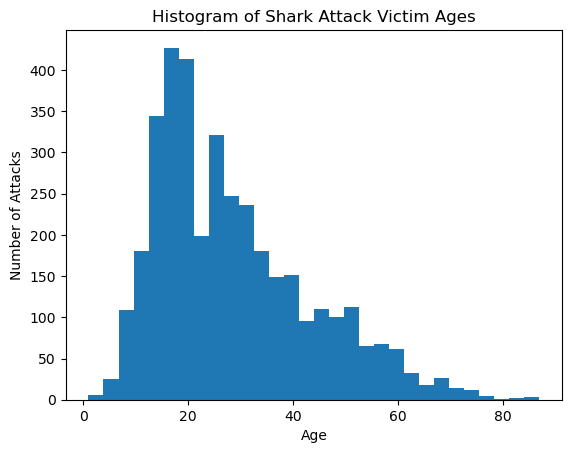

In [ ]:
import matplotlib.pyplot as plt
df_shark_clean['Age_clean'] = (df_shark_clean['Age'].astype(str).str.extract(r'(\d+)')  .astype(float))
plt.hist(df_shark_clean['Age_clean'].dropna(), bins=30)
plt.xlabel("Age")
plt.ylabel("Number of Attacks")
plt.title("Histogram of Shark Attack Victim Ages")
plt.show()

In [ ]:
df_shark_clean['Type']=df_shark_clean['Type'].where(df_shark_clean['Type'].isin(["Provoked","Unprovoked"]), other='Unknown')
divide=df_shark_clean['Type'].value_counts(normalize=True)
print(divide)

Type
Unprovoked    0.744854
Unknown       0.161069
Provoked      0.094077
Name: proportion, dtype: float64


In [ ]:
df_shark_clean['Fatal Y/N']=df_shark_clean['Fatal Y/N'].where(df_shark_clean['Fatal Y/N'].isin(["Y","N"]), other='Unknown')
Compare=pd.crosstab(df_shark_clean['Type'], df_shark_clean['Fatal Y/N'])
print(Compare)

Fatal Y/N      N  Unknown    Y
Type                          
Provoked     497       12   12
Unknown      368      400  124
Unprovoked  3373       58  694


1. Since it's an excel file, we can use pandas read_excel function. 
2. An observation is basically a row in this case since each row is equivalent to a single shark attack incident. This affects cleaning since when I make a decision to drop a row that has a missing year, it will remove the entire attack record and not just part of the information. 
3. After the year was cleaned, it shows that there is an increase in the number of reported attacks over time. 
6. Based on the statistics, attacks are more likely to be fatal when unprovoked. This could potentially be due to the perspective of the victim where if provoked, they would not want to attack. 

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

1. The paper talks about a structure to be able to clean data in order to analyze and graph models easier.
2. Tidy data puts data in the same clear structure every time to make it easier to organize and work with. 
3. This means that the Tidy dataset all follow the same rules, but messy datasets can be messy in many different ways. Next, they are hard to define since it is usually easy to tell what the variables are in one dataset, but it can't be defined that way every time.
4. Values are the individual data points, variables are the metrics being measured, and the observations are all the measurements for one instance.
5. In section 2.3, each variable is a column, each observation is a row, and each type of data is in its own table. 
6. The most common problems are how it puts values in column names, mixes varaibles together, spreads varaibles across rows and columns, or combines different kinds of data in one table. Table 4 is messy since it puts the income levels inside the column names instead of as values in a single column. Melting a dataset turns columns into rows so that values are stored in one column instead of spread across different ones.
7. Table 11 spreads data across rows and columns in confusing ways, but Table 12 puts each day in one row and each metric in its own column.


**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? 

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
6. Which giftors provide the most money, in total? 

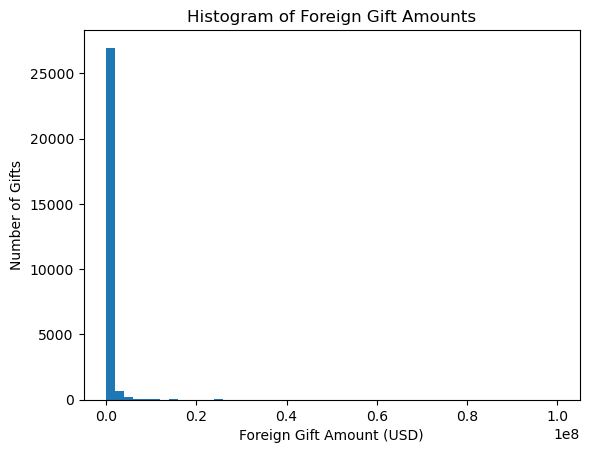

In [ ]:
df_fg =pd.read_csv("data/ForeignGifts_edu.csv", encoding= "latin1")
amounts = df_fg["Foreign Gift Amount"].dropna()
amounts = amounts[amounts > 0]
plt.figure()
plt.hist(amounts, bins=50)
plt.xlabel("Foreign Gift Amount (USD)")
plt.ylabel("Number of Gifts")
plt.title("Histogram of Foreign Gift Amounts")
plt.show()

We can see that most foreign gifts are small and there are a few very large gifts that stretch to the right of the graph. Most gifts are under 100k, while a small number of gifts reach tens of millions of dollars.

In [ ]:
df_fg['Gift Type'].value_counts()


Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64

In [ ]:
divide = df_fg['Gift Type'].value_counts(normalize=True)
print(divide)

Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: proportion, dtype: float64


In [ ]:
top_count = (df_fg.groupby("Country of Giftor").size().sort_values(ascending=False).head(15))
top_amount = (df_fg.groupby("Country of Giftor")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15))
top_count

Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
dtype: int64

In [ ]:
top_amount

Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64

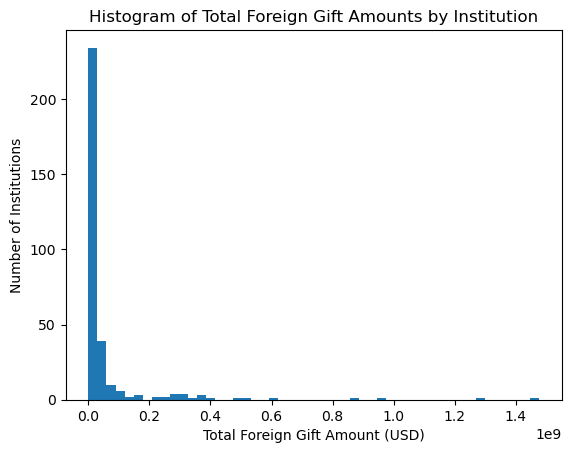

Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64

In [ ]:
inst_totals = (df_fg.groupby("Institution Name")["Foreign Gift Amount"].sum().sort_values(ascending=False))
top_15_inst = inst_totals.head(15)
plt.figure()
plt.hist(inst_totals, bins=50)
plt.xlabel("Total Foreign Gift Amount (USD)")
plt.ylabel("Number of Institutions")
plt.title("Histogram of Total Foreign Gift Amounts by Institution")
plt.show()
top_15_inst

In [ ]:
df_fg.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64

The giftor what provides the most money in total is the Qatar Foundation

**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

In [ ]:
df_cc = pd.read_csv("data/college_completion.csv", encoding= "latin1")
df_cc

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3793,3793,461528,Grace College of Divinity,Fayetteville,North Carolina,4-year,Private not-for-profit,Not applicable- not in Carnegie universe,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,43,81,NaN,NaN,12.0
3794,3794,462354,John Paul the Great Catholic University,Escondido,California,4-year,Private not-for-profit,Not applicable- not in Carnegie universe,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,74,81,NaN,NaN,33.0
3795,3795,466921,Chamberlain College of Nursing-Missouri,St. Louis,Missouri,4-year,Private for-profit,Not applicable- not in Carnegie universe,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,20,81,NaN,NaN,8.0
3796,3796,474881,Minneapolis Media Institute,Edina,Minnesota,2-year,Private for-profit,Not applicable- not in Carnegie universe,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5,81,NaN,NaN,145.0


In [ ]:
print("Rows (observations):", df_cc.shape[0])
print("Columns (variables):", df_cc.shape[1])
display(df_cc.head())

Rows (observations): 3798
Columns (variables): 63


,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [ ]:
ct = pd.crosstab(df_cc["control"], df_cc["level"])
display(ct)

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


2 year colleges are mainly public while 4 year colleges are usually private not-for-profit, with for-profit schools in both categories

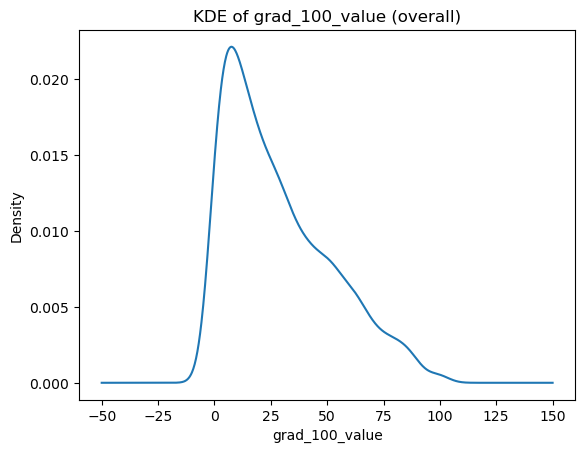

In [ ]:
plt.figure()
df_cc["grad_100_value"].dropna().plot(kind="kde")
plt.xlabel("grad_100_value")
plt.title("KDE of grad_100_value (overall)")
plt.show()

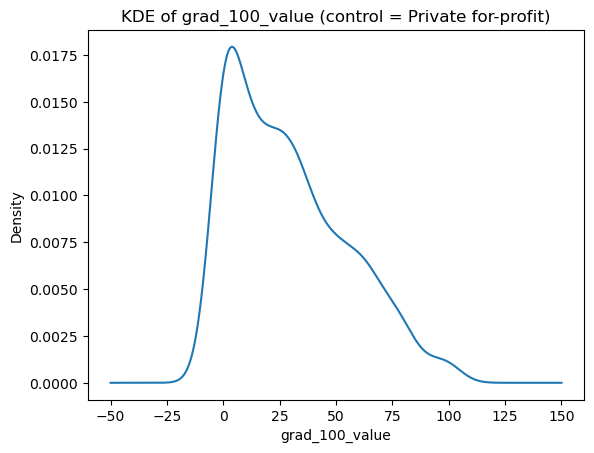


control = Private for-profit


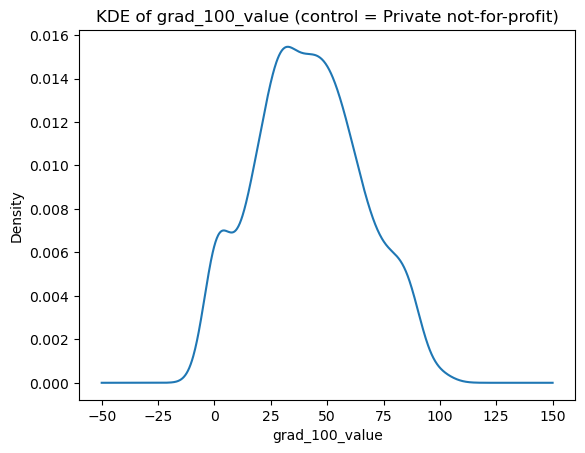


control = Private not-for-profit


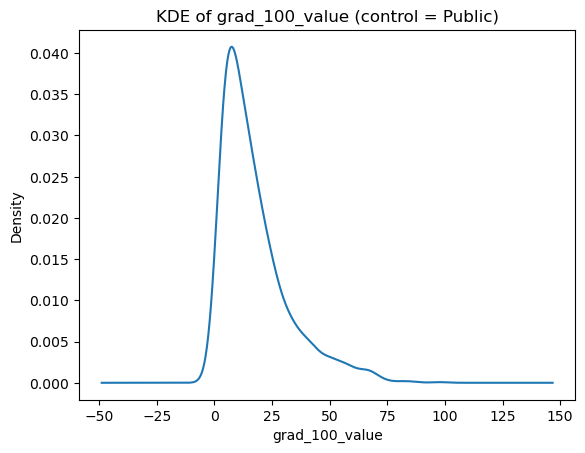


control = Public


In [ ]:
for ctrl, sub in df_cc.groupby("control"):
    plt.figure()
    sub["grad_100_value"].dropna().plot(kind="kde")
    plt.xlabel("grad_100_value")
    plt.title(f"KDE of grad_100_value (control = {ctrl})")
    plt.show()
    print(f"\ncontrol = {ctrl}")

For private for-profit institutions, graduation rates are mostly low and a few schools do much better but most have poor graduation rates. 

For private not-for-profit instututions, graduation rates are higher in general, and has the highest and most consistent grad rates. 

For public institutions, generation rates are generally lower than private not-for-profit but higher than for-profit. 

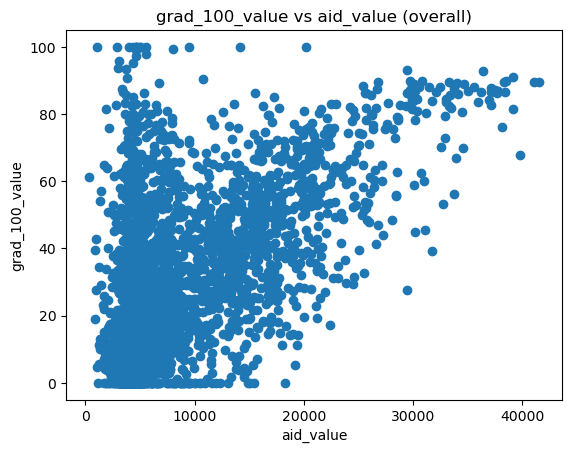

Overall covariance: 88610.48316902436
Overall correlation: 0.5758792845936076


In [ ]:
clean = df_cc[["grad_100_value", "aid_value"]].dropna()
plt.figure()
plt.scatter(clean["aid_value"], clean["grad_100_value"])
plt.xlabel("aid_value")
plt.ylabel("grad_100_value")
plt.title("grad_100_value vs aid_value (overall)")
plt.show()
cov = clean["grad_100_value"].cov(clean["aid_value"])
corr = clean["grad_100_value"].corr(clean["aid_value"])
print("Overall covariance:", cov)
print("Overall correlation:", corr)

Theres a positive correlation between financial aid and grad rates. As aid value goes up, then grad 100 value usually increases. 

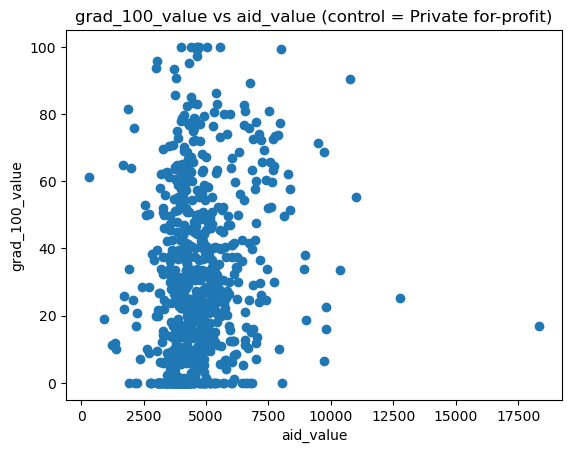


control = Private for-profit
  covariance: 6897.5249572378125
  correlation: 0.188362700842456


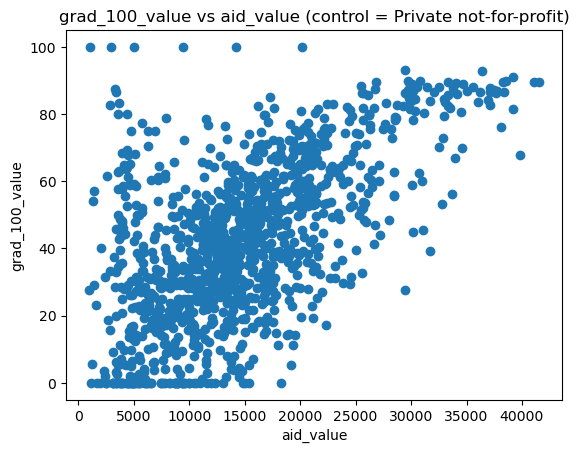


control = Private not-for-profit
  covariance: 109274.12333702885
  correlation: 0.6015909241488576


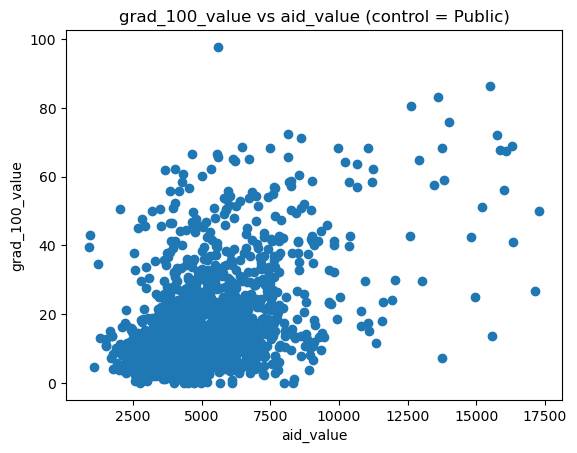


control = Public
  covariance: 15355.14621176021
  correlation: 0.4824810458983381


In [ ]:
for ctrl, sub in df_cc.groupby("control"):
    sub_clean = sub[["grad_100_value", "aid_value"]].dropna()
    if len(sub_clean) < 2:
        continue
    plt.figure()
    plt.scatter(sub_clean["aid_value"], sub_clean["grad_100_value"])
    plt.xlabel("aid_value")
    plt.ylabel("grad_100_value")
    plt.title(f"grad_100_value vs aid_value (control = {ctrl})")
    plt.show()
    cov_c = sub_clean["grad_100_value"].cov(sub_clean["aid_value"])
    corr_c = sub_clean["grad_100_value"].corr(sub_clean["aid_value"])
    print(f"\ncontrol = {ctrl}")
    print("  covariance:", cov_c)
    print("  correlation:", corr_c)

For private for-profit institutions, there is little to no relationship between aid and grad rates. 

For private not-for-profit instutitutes, there is a strong positive correaltion between aid and graduation rates.

For public institutions, there is a slight positive relationship between aid and grad rates. 

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$. 

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

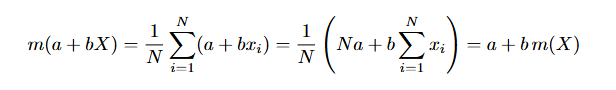

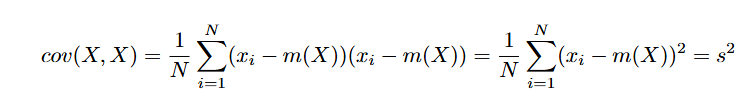

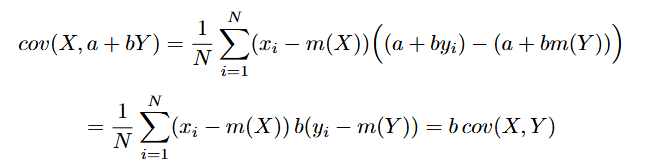

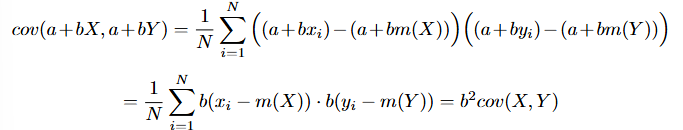

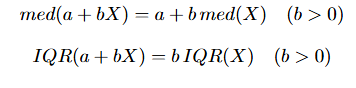

The first expression is true while the second expression does not equal a+bIQR(X)

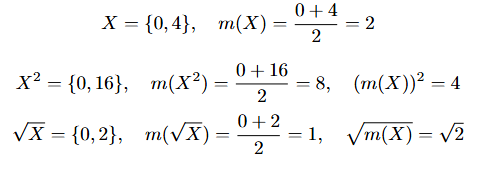

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

In [ ]:
df_am = pd.read_csv("data/ames_prices.csv", encoding= "latin1")
df_am.head()

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


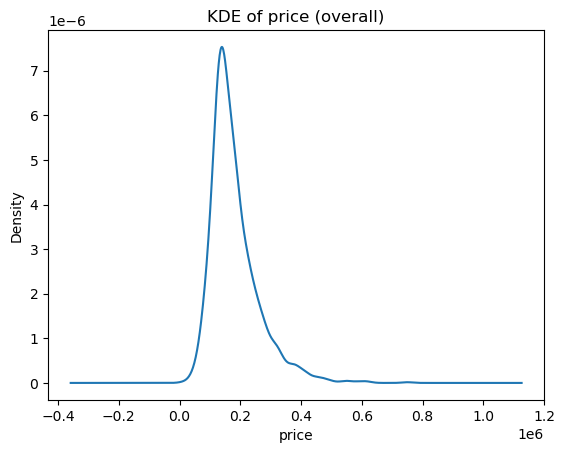

Describe (overall):
count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64


In [ ]:
plt.figure()
df_am["price"].dropna().plot(kind="kde")
plt.xlabel("price")
plt.title("KDE of price (overall)")
plt.show()

print("Describe (overall):")
print(df_am["price"].describe())

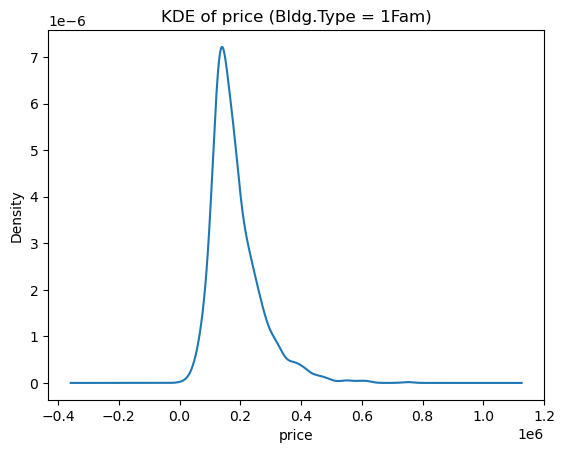

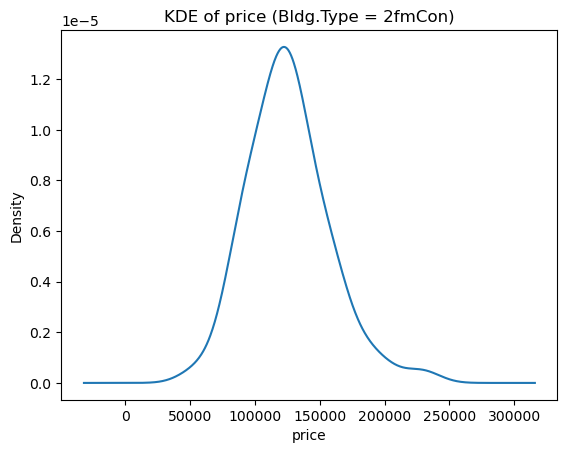

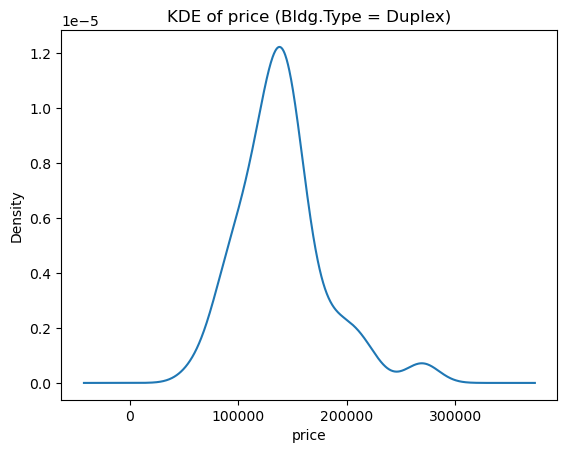

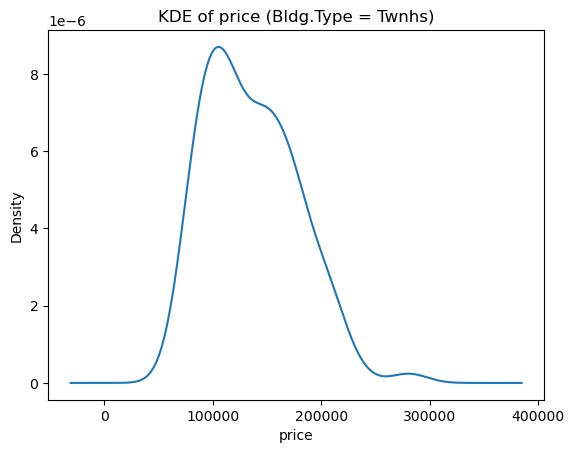

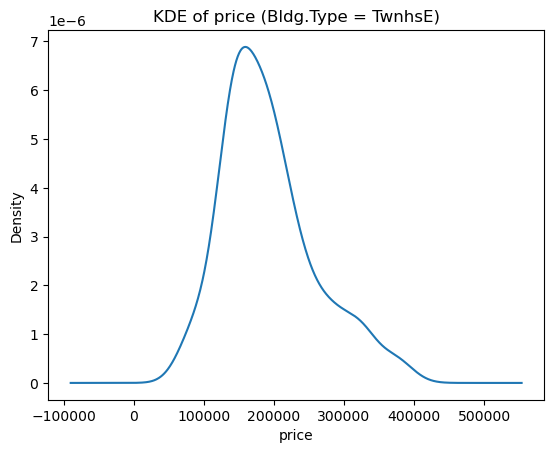


Describe by building type:
            count           mean           std      min       25%       50%  \
Bldg.Type                                                                     
1Fam       2425.0  184812.041237  82821.802329  12789.0  130000.0  165000.0   
2fmCon       62.0  125581.709677  31089.239840  55000.0  106562.5  122250.0   
Duplex      109.0  139808.935780  39498.973534  61500.0  118858.0  136905.0   
Twnhs       101.0  135934.059406  41938.931130  73000.0  100500.0  130000.0   
TwnhsE      233.0  192311.914163  66191.738021  71000.0  145000.0  180000.0   

                75%       max  
Bldg.Type                      
1Fam       220000.0  755000.0  
2fmCon     140000.0  228950.0  
Duplex     153337.0  269500.0  
Twnhs      170000.0  280750.0  
TwnhsE     222000.0  392500.0  

Most expensive (highest mean):
Bldg.Type
TwnhsE    192311.914163
1Fam      184812.041237
Duplex    139808.935780
Twnhs     135934.059406
2fmCon    125581.709677
Name: mean, dtype: float64

High

In [ ]:
for bt, sub in df_am.groupby("Bldg.Type"):
    plt.figure()
    sub["price"].dropna().plot(kind="kde")
    plt.xlabel("price")
    plt.title(f"KDE of price (Bldg.Type = {bt})")
    plt.show()
group_desc = df_am.groupby("Bldg.Type")["price"].describe()
print("\nDescribe by building type:")
print(group_desc)
print("\nMost expensive (highest mean):")
print(group_desc["mean"].sort_values(ascending=False).head(10))
print("\nHighest variance (highest std):")
print(group_desc["std"].sort_values(ascending=False).head(10))

TwnhsE houses are usually the most expensive and 1Fam has has the highest variance.

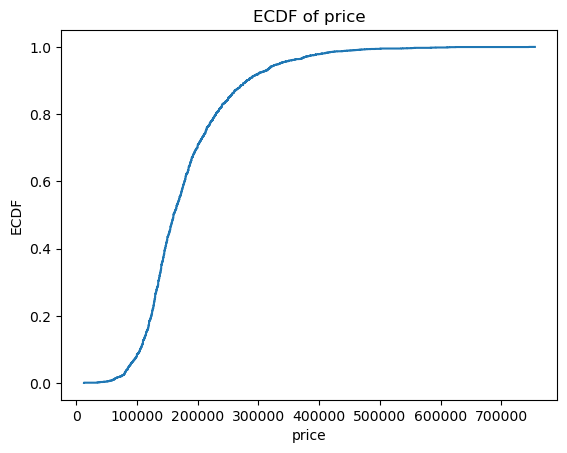


5-number summary (min, 25%, median, 75%, max):
0.00     12789.0
0.25    129500.0
0.50    160000.0
0.75    213500.0
1.00    755000.0
Name: price, dtype: float64


In [ ]:
import numpy as np
prices = df_am["price"].dropna().sort_values().to_numpy()
ecdf_y = np.arange(1, len(prices) + 1) / len(prices)
plt.figure()
plt.step(prices, ecdf_y)
plt.xlabel("price")
plt.ylabel("ECDF")
plt.title("ECDF of price")
plt.show()
five_num = df_am["price"].quantile([0, 0.25, 0.5, 0.75, 1.0])
print("\n5-number summary (min, 25%, median, 75%, max):")
print(five_num)

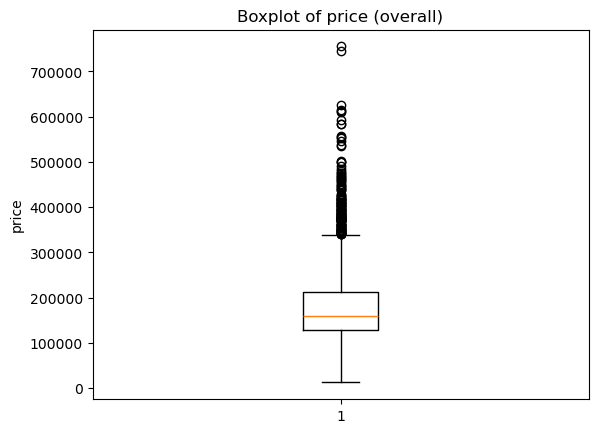

In [ ]:
plt.figure()
plt.boxplot(df_am["price"].dropna(), vert=True)
plt.ylabel("price")
plt.title("Boxplot of price (overall)")
plt.show()
     

As we can see, there are outliers in the overall boxplot of price. 

<Figure size 1000x500 with 0 Axes>

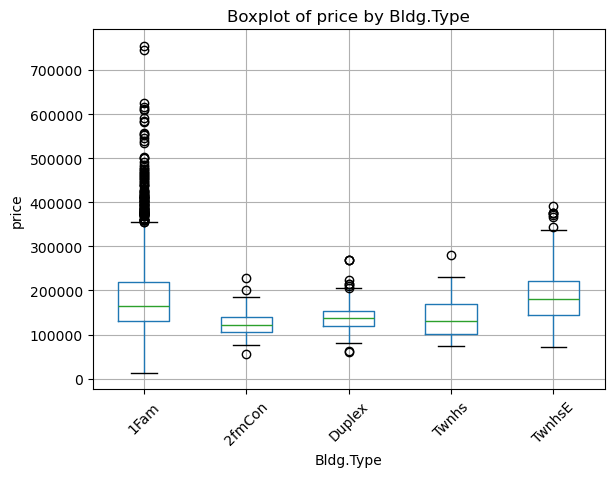

In [ ]:
plt.figure(figsize=(10, 5))
df_am.boxplot(column="price", by="Bldg.Type", rot=45)
plt.title("Boxplot of price by Bldg.Type")
plt.suptitle("")  # remove automatic suptitle
plt.xlabel("Bldg.Type")
plt.ylabel("price")
plt.show()

In [ ]:
q1 = df_am["price"].quantile(0.25)
q3 = df_am["price"].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

df_am["is_outlier"] = ((df_am["price"] < lower) | (df_am["price"] > upper)).astype(int)
print("\nOutlier counts (0 = not outlier, 1 = outlier):")
print(df_am["is_outlier"].value_counts())


Outlier counts (0 = not outlier, 1 = outlier):
is_outlier
0    2793
1     137
Name: count, dtype: int64


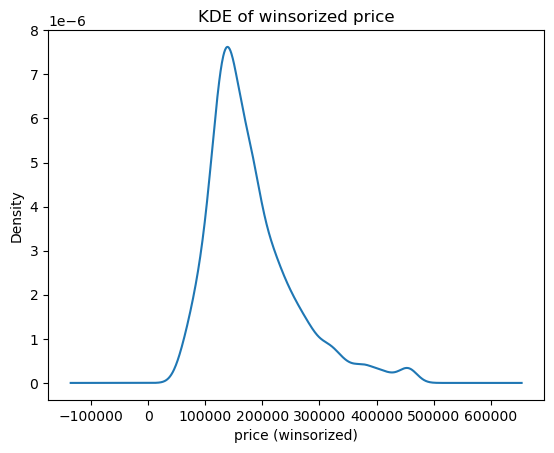


Describe (winsorized):
count      2930.000000
mean     180091.154334
std       75842.579174
min       61756.070000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      456666.370000
Name: price_winsor, dtype: float64


In [ ]:
lo = df_am["price"].quantile(0.01)
hi = df_am["price"].quantile(0.99)
df_am["price_winsor"] = df_am["price"].clip(lower=lo, upper=hi)

plt.figure()
df_am["price_winsor"].dropna().plot(kind="kde")
plt.xlabel("price (winsorized)")
plt.title("KDE of winsorized price")
plt.show()

print("\nDescribe (winsorized):")
print(df_am["price_winsor"].describe())

After winsorizing, the results do make a change since the distributions become smoother. The high price outliers are capped so that contributes to the influence.